# 2022 빅콘테스트_spec 데이터 전처리
## 우 걱정마세요

##1. 라이브러리 및 패키지 불러오기

In [105]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [106]:
user_spec = pd.read_csv('/content/drive/MyDrive/2022_Bigcontest/Data/user_spec.csv')
user_spec.head()

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,1249046,118218,1985.0,1.0,2022-06-07 06:28:18,660.0,108000000.0,PRIVATEBUSINESS,20151101.0,기타,자가,1000000.0,기타,0.0,NaN,4.0,162000000.0
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,0.0,NaN,1.0,27000000.0
2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,기타가족소유,10000000.0,생활비,0.0,NaN,5.0,15000000.0
3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,정규직,자가,2000000.0,생활비,0.0,NaN,7.0,344000000.0
4,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,20210901.0,정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0


##2. 결측값이 9개 이상인 row 제거

In [107]:
respec = user_spec.dropna(subset = ['income_type'])

##3. yearly_income 컬럼

In [108]:
respec[respec['yearly_income'].isnull()]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
165422,1026915,861363,1995.0,1.0,2022-06-30 21:11:51,NaN,NaN,OTHERINCOME,NaN,기타,전월세,5000000.0,생활비,0.0,0.0,NaN,NaN
233316,2045613,702899,1995.0,1.0,2022-06-30 18:37:04,520.0,NaN,FREELANCER,20220630.0,기타,전월세,5000000.0,전월세보증금,0.0,0.0,1.0,1000000.0
597591,391560,329226,1996.0,0.0,2022-06-30 19:27:28,590.0,NaN,OTHERINCOME,NaN,기타,전월세,20000000.0,생활비,0.0,0.0,9.0,27000000.0
597613,341149,670502,1981.0,1.0,2022-06-30 21:32:18,930.0,NaN,OTHERINCOME,NaN,기타,기타가족소유,6000000.0,사업자금,0.0,0.0,1.0,3000000.0
971960,1330905,771592,2003.0,1.0,2022-06-30 18:57:05,750.0,NaN,OTHERINCOME,NaN,기타,자가,3000000.0,생활비,0.0,0.0,1.0,3000000.0


In [109]:
respec.loc[respec['yearly_income'].isnull(), 'yearly_income'] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


## 4. purpose 컬럼

In [110]:
respec.isnull().sum()

application_id                               0
user_id                                      0
birth_year                               12959
gender                                   12959
insert_time                                  0
credit_score                            105112
yearly_income                                0
income_type                                  0
company_enter_month                     171675
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn              587376
personal_rehabilitation_complete_yn    1203269
existing_loan_cnt                       198540
existing_loan_amt                       313752
dtype: int64

In [111]:
respec['purpose'].unique()

array(['기타', '대환대출', '생활비', '사업자금', '주택구입', '전월세보증금', '투자', 'LIVING',
       'SWITCHLOAN', 'ETC', 'INVEST', '자동차구입', 'BUSINESS', 'BUYCAR',
       'HOUSEDEPOSIT', 'BUYHOUSE'], dtype=object)

In [112]:
respec['purpose'] = respec['purpose'].replace("기타", 'ETC').replace("대환대출", 'SWITCHLOAN').replace("생활비", 'LIVING').replace("사업자금", "BUSINESS").replace("주택구입", 'BUYHOUSE').replace("전월세보증금", 'HOUSEDEPOSIT').replace("투자", 'INVEST').replace("자동차구입", 'BUYCAR')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [113]:
respec.groupby(['purpose']).mean()

,application_id,user_id,birth_year,gender,credit_score,yearly_income,company_enter_month,desired_amount,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
purpose,,,,,,,,,,,,
BUSINESS,1.083056e+06,437578.086154,1980.777790,0.697858,694.270873,7.164298e+07,5.072147e+06,4.494958e+07,0.015288,0.011308,3.504064,8.042556e+07
BUYCAR,1.076957e+06,438989.706999,1986.214694,0.812178,684.433024,5.049731e+07,1.306264e+06,2.970332e+07,0.031042,0.021127,3.039635,6.421831e+07
BUYHOUSE,1.083973e+06,436362.846158,1983.697397,0.681699,819.493152,5.450197e+07,4.918962e+06,1.718995e+08,0.010926,0.007347,2.538954,8.886561e+07
ETC,1.079840e+06,438622.859333,1982.462834,0.671482,673.352993,4.451424e+07,5.018580e+06,4.240260e+07,0.022669,0.009895,4.010702,6.911641e+07
HOUSEDEPOSIT,1.087935e+06,439299.895064,1985.916276,0.621204,716.028147,4.316677e+07,5.073002e+06,7.786010e+07,0.027570,0.010152,2.772844,5.413286e+07
INVEST,1.092035e+06,438081.930225,1985.521632,0.862904,769.919451,5.501032e+07,4.982424e+06,6.792337e+07,0.006240,0.008980,3.651293,9.522019e+07
LIVING,1.084111e+06,439967.580608,1983.181228,0.673505,625.478551,4.096917e+07,5.142721e+06,2.037487e+07,0.018038,0.007151,5.001972,6.913450e+07
SWITCHLOAN,1.083899e+06,439263.970746,1983.720593,0.676328,640.013624,4.350789e+07,5.145603e+06,3.950921e+07,0.009272,0.005657,4.636365,7.277597e+07


##5. birth_year 컬럼
* birth_year을 나이로 바꿔주었음.
* 나이를 10단위로 바꿔주었고, 70이상의 값은 70으로 처리
* yearly_income을 기준으로 null값을 채움

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


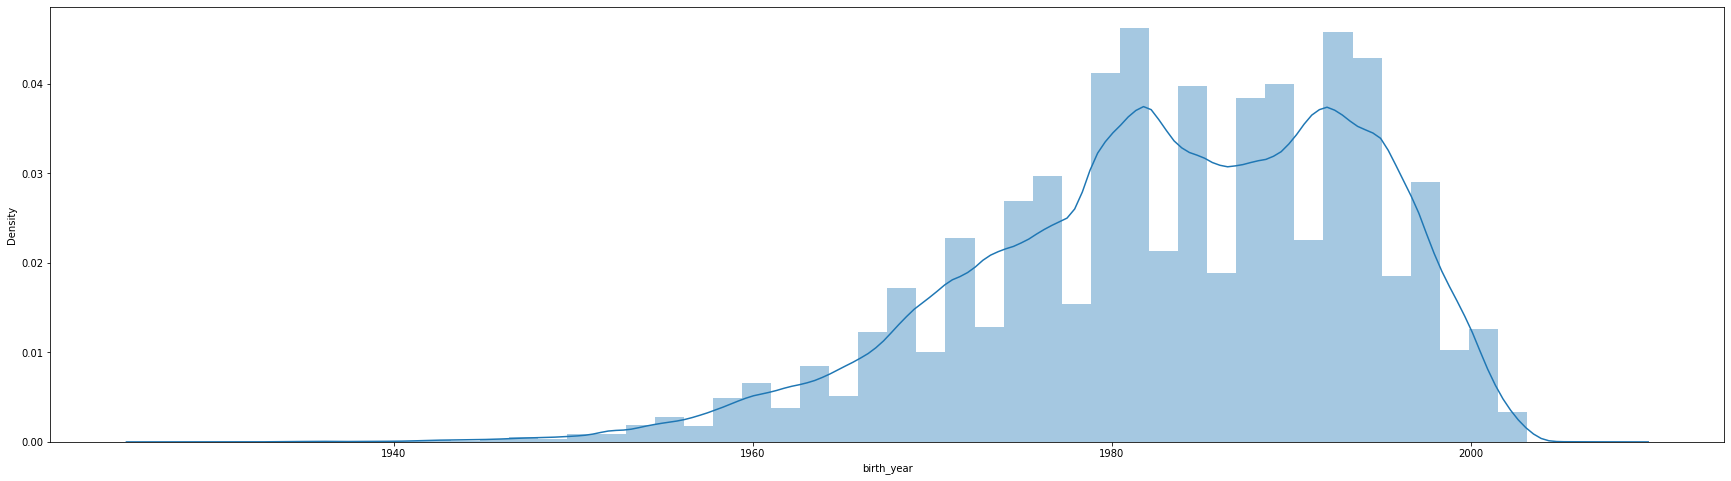

In [114]:
plt.figure(figsize=(30,8))
sns.distplot(respec['birth_year'])
plt.show()

In [115]:
respec['age'] = 2023 - respec['birth_year']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


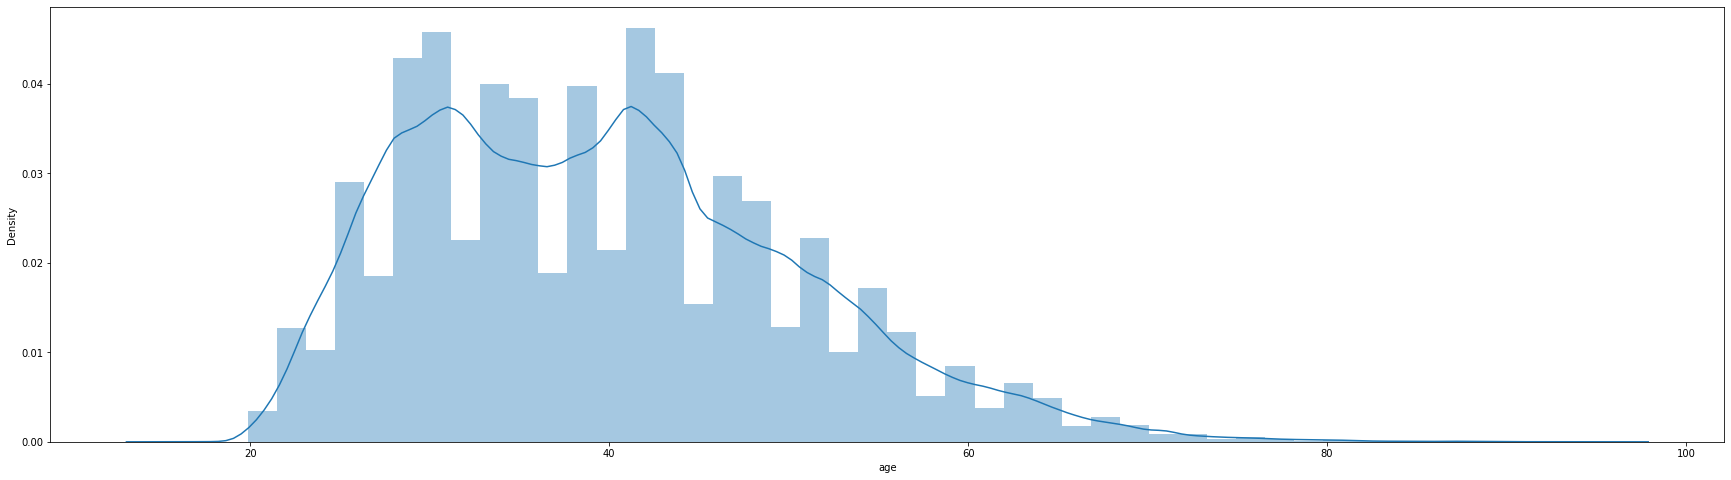

In [116]:
plt.figure(figsize=(30,8))
sns.distplot(respec['age'])
plt.show()

In [117]:
respec.loc[respec['age'] < 20, 'reage'] = 10
respec.loc[(respec['age'] >= 20) & (respec['age'] <30), 'reage'] = 20
respec.loc[(respec['age'] >= 30) & (respec['age'] <40), 'reage'] = 30
respec.loc[(respec['age'] >= 40) & (respec['age'] <50), 'reage'] = 40
respec.loc[(respec['age'] >= 50) & (respec['age'] <60), 'reage'] = 50
respec.loc[(respec['age'] >= 60) & (respec['age'] <70), 'reage'] = 60
respec.loc[respec['age'] >= 70, 'reage'] = 70

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [118]:
respec.groupby(['reage']).mean()

,application_id,user_id,birth_year,gender,credit_score,yearly_income,company_enter_month,desired_amount,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age
reage,,,,,,,,,,,,,
10.0,1.064194e+06,455693.868421,2005.017544,0.763158,727.894737,2.371053e+07,5.469021e+06,2.783596e+08,0.101124,0.210526,1.000000,NaN,17.982456
20.0,1.084303e+06,440691.349461,1996.726845,0.710269,626.343699,2.933889e+07,5.344644e+06,1.977717e+07,0.011120,0.002367,3.824053,3.401478e+07,26.273155
30.0,1.084433e+06,440882.277204,1988.671923,0.701614,641.346381,4.047910e+07,5.117083e+06,3.138149e+07,0.014037,0.006113,4.710535,6.765369e+07,34.328077
40.0,1.081947e+06,436590.725867,1979.070624,0.650786,641.188582,4.914576e+07,5.033486e+06,3.288367e+07,0.018161,0.014178,5.144666,8.840543e+07,43.929376
50.0,1.086161e+06,441002.207551,1969.441814,0.653708,638.356915,5.745686e+07,4.963377e+06,3.586131e+07,0.020097,0.026471,5.081826,8.694078e+07,53.558186
60.0,1.086536e+06,437587.806977,1959.664978,0.603164,641.153846,4.716989e+07,5.068176e+06,3.395843e+07,0.019472,0.030141,4.901452,6.487075e+07,63.335022
70.0,1.093017e+06,451108.777550,1948.812852,0.509363,669.453841,3.590279e+07,5.805380e+06,2.202415e+07,0.010503,0.009317,4.899381,5.294928e+07,74.187148


In [119]:
respec2 = respec[respec['reage'].isnull()]

In [120]:
respec.loc[(respec['reage'].isnull()) & (respec['yearly_income'] < 2.371053e+07), 'reage'] = 10
respec.loc[(respec['reage'].isnull()) & (respec['yearly_income'] >= 2.371053e+07) & (respec['yearly_income'] < 2.933934e+07), 'reage'] = 20
respec.loc[(respec['reage'].isnull()) & (respec['yearly_income'] >= 2.933934e+07) & (respec['yearly_income'] < 3.590279e+07	), 'reage'] = 70
respec.loc[(respec['reage'].isnull()) & (respec['yearly_income'] >= 3.590279e+07) & (respec['yearly_income'] < 4.047910e+07), 'reage'] = 30
respec.loc[(respec['reage'].isnull()) & (respec['yearly_income'] >= 4.047910e+07) & (respec['yearly_income'] < 4.716989e+07	), 'reage'] = 60
respec.loc[(respec['reage'].isnull()) & (respec['yearly_income'] >= 4.716989e+07) & (respec['yearly_income'] < 4.914588e+07), 'reage'] = 40
respec.loc[(respec['reage'].isnull()) & (respec['yearly_income'] >= 4.914588e+07) , 'reage'] = 50

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [121]:
respec.isnull().sum()

application_id                               0
user_id                                      0
birth_year                               12959
gender                                   12959
insert_time                                  0
credit_score                            105112
yearly_income                                0
income_type                                  0
company_enter_month                     171675
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn              587376
personal_rehabilitation_complete_yn    1203269
existing_loan_cnt                       198540
existing_loan_amt                       313752
age                                      12959
reage                                        0
dtype: int64

In [122]:
respec = respec.drop(['birth_year', 'age'], axis = 1)

## 6. gender 컬럼

In [123]:
respec['gender'].value_counts()

1.0    934267
0.0    446905
Name: gender, dtype: int64

In [124]:
respec['income_type'].unique()

array(['PRIVATEBUSINESS', 'FREELANCER', 'EARNEDINCOME', 'OTHERINCOME',
       'EARNEDINCOME2', 'PRACTITIONER'], dtype=object)

In [125]:
respec['income_type'] = respec['income_type'].replace("PRIVATEBUSINESS", 1).replace("FREELANCER", 2).replace("EARNEDINCOME", 3).replace("OTHERINCOME", 4).replace("EARNEDINCOME2", 5).replace("PRACTITIONER", 6)

In [126]:
# income_type == 1
rnd_num = np.random.uniform(0, 1, 1)

if rnd_num > 0.3:
  respec.loc[(respec['gender'].isnull()) & (respec['income_type'] == 1), 'gender'] = 1
else:
  respec.loc[(respec['gender'].isnull()) & (respec['income_type'] == 1), 'gender'] = 0

In [127]:
# income_type == 2
rnd_num = np.random.uniform(0, 1, 1)

if rnd_num > 0.4:
  respec.loc[(respec['gender'].isnull()) & (respec['income_type'] == 2), 'gender'] = 1
else:
  respec.loc[(respec['gender'].isnull()) & (respec['income_type'] == 2), 'gender'] = 0

In [128]:
# income_type == 3
rnd_num = np.random.uniform(0, 1, 1)

if rnd_num > 0.3:
  respec.loc[(respec['gender'].isnull()) & (respec['income_type'] == 3), 'gender'] = 1
else:
  respec.loc[(respec['gender'].isnull()) & (respec['income_type'] == 3), 'gender'] = 0

In [129]:
# income_type == 4
rnd_num = np.random.uniform(0, 1, 1)

if rnd_num > 0.5:
  respec.loc[(respec['gender'].isnull()) & (respec['income_type'] == 4), 'gender'] = 1
else:
  respec.loc[(respec['gender'].isnull()) & (respec['income_type'] == 4), 'gender'] = 0

In [130]:
# income_type == 5
rnd_num = np.random.uniform(0, 1, 1)

if rnd_num > 0.4:
  respec.loc[(respec['gender'].isnull()) & (respec['income_type'] == 5), 'gender'] = 1
else:
  respec.loc[(respec['gender'].isnull()) & (respec['income_type'] == 5), 'gender'] = 0

In [131]:
# income_type == 6
rnd_num = np.random.uniform(0, 1, 1)

if rnd_num > 0.3:
  respec.loc[(respec['gender'].isnull()) & (respec['income_type'] == 6), 'gender'] = 1
else:
  respec.loc[(respec['gender'].isnull()) & (respec['income_type'] == 6), 'gender'] = 0

## 7. company_enter_month 컬럼

In [132]:
respec.loc[(respec['company_enter_month'] < 10000000),'company_enter_month'] = respec['company_enter_month'] / 100

In [133]:
respec.loc[(respec['company_enter_month'] >= 10000000),'company_enter_month'] = respec['company_enter_month'] / 10000

In [134]:
respec['company_enter_month'] = respec['company_enter_month'].round()

In [135]:
respec.groupby(['reage'])['company_enter_month'].mean()

reage
10.0    2019.948491
20.0    2020.688256
30.0    2019.138488
40.0    2017.020268
50.0    2015.651676
60.0    2016.711339
70.0    2017.549947
Name: company_enter_month, dtype: float64

In [136]:
respec.loc[(respec['company_enter_month'].isnull()) & (respec['reage'] <= 10),'company_enter_month'] = 2020
respec.loc[(respec['company_enter_month'].isnull()) & (respec['reage'] > 10) & (respec['reage'] <= 20),'company_enter_month'] = 2021
respec.loc[(respec['company_enter_month'].isnull()) & (respec['reage'] > 20) & (respec['reage'] <= 30),'company_enter_month'] = 2020
respec.loc[(respec['company_enter_month'].isnull()) & (respec['reage'] > 30) & (respec['reage'] <= 40),'company_enter_month'] = 2017
respec.loc[(respec['company_enter_month'].isnull()) & (respec['reage'] > 40) & (respec['reage'] <= 50),'company_enter_month'] = 2016
respec.loc[(respec['company_enter_month'].isnull()) & (respec['reage'] > 50) & (respec['reage'] <= 60),'company_enter_month'] = 2017
respec.loc[(respec['company_enter_month'].isnull()) & (respec['reage'] > 60),'company_enter_month'] = 2018

## 7. existing_loan_cnt

In [137]:
respec.loc[respec['existing_loan_cnt'].isnull(), 'existing_loan_cnt'] = 0

## 8. existing_loan_amt

In [138]:
respec.loc[(respec['existing_loan_amt'].isnull()) & (respec['existing_loan_cnt']==0), 'existing_loan_amt'] = 0

In [139]:
print(respec['existing_loan_amt'].describe())

count    1.278919e+06
mean     5.976339e+07
std      8.704072e+07
min      0.000000e+00
25%      1.000000e+07
50%      3.500000e+07
75%      7.200000e+07
max      7.512000e+09
Name: existing_loan_amt, dtype: float64


In [140]:
respec.loc[(respec['existing_loan_amt'].isnull()), 'existing_loan_amt'] = 31000000.0

## 9. personal_rehabilitation_yn

In [141]:
# 794046
respec[respec['personal_rehabilitation_yn']==0]

,application_id,user_id,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,reage
0,1249046,118218,1.0,2022-06-07 06:28:18,660.0,108000000.0,1,2015.0,기타,자가,1000000.0,ETC,0.0,NaN,4.0,162000000.0,30.0
1,954900,553686,1.0,2022-06-07 14:29:03,870.0,30000000.0,1,2007.0,정규직,기타가족소유,30000000.0,SWITCHLOAN,0.0,NaN,1.0,27000000.0,50.0
2,137274,59516,1.0,2022-06-07 21:40:22,710.0,30000000.0,2,2021.0,기타,기타가족소유,10000000.0,LIVING,0.0,NaN,5.0,15000000.0,20.0
3,1570936,167320,1.0,2022-06-07 09:40:27,820.0,62000000.0,3,2017.0,정규직,자가,2000000.0,LIVING,0.0,NaN,7.0,344000000.0,30.0
4,967833,33400,1.0,2022-06-07 08:55:07,630.0,36000000.0,3,2021.0,정규직,기타가족소유,5000000.0,LIVING,0.0,0.0,1.0,16000000.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394084,759813,659656,0.0,2022-06-21 14:25:07,600.0,34000000.0,3,2021.0,정규직,기타가족소유,1000000.0,LIVING,0.0,0.0,5.0,46000000.0,30.0
1394085,2138480,848568,1.0,2022-06-21 14:55:00,620.0,25000000.0,4,2021.0,기타,전월세,3000000.0,LIVING,0.0,NaN,1.0,3000000.0,20.0
1394086,242374,293080,1.0,2022-06-21 21:13:54,660.0,78000000.0,3,2020.0,정규직,자가,30000000.0,LIVING,0.0,NaN,3.0,202000000.0,40.0
1394087,1356506,50945,1.0,2022-06-21 09:07:48,560.0,34000000.0,3,2020.0,정규직,전월세,4000000.0,LIVING,0.0,NaN,5.0,65000000.0,40.0


In [142]:
# 178149
respec[(respec['personal_rehabilitation_yn']==0)& (respec['personal_rehabilitation_complete_yn']==0)]

,application_id,user_id,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,reage
4,967833,33400,1.0,2022-06-07 08:55:07,630.0,36000000.0,3,2021.0,정규직,기타가족소유,5000000.0,LIVING,0.0,0.0,1.0,16000000.0,20.0
7,1146166,588743,0.0,2022-06-07 17:19:33,750.0,46000000.0,3,2015.0,정규직,기타가족소유,6000000.0,LIVING,0.0,0.0,0.0,0.0,30.0
9,311143,646289,1.0,2022-06-07 10:17:19,530.0,28000000.0,3,2022.0,계약직,기타가족소유,3000000.0,LIVING,0.0,0.0,5.0,19000000.0,20.0
10,1607787,555995,1.0,2022-06-07 09:47:01,640.0,57000000.0,3,2022.0,계약직,전월세,25000000.0,SWITCHLOAN,0.0,0.0,4.0,62000000.0,40.0
18,1903409,168234,0.0,2022-06-07 09:43:20,560.0,12000000.0,5,2021.0,기타,기타가족소유,3000000.0,LIVING,0.0,0.0,10.0,23000000.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394076,1238468,479009,1.0,2022-06-21 20:37:44,540.0,36000000.0,3,2021.0,정규직,기타가족소유,3000000.0,LIVING,0.0,0.0,4.0,60000000.0,30.0
1394081,11137,303899,1.0,2022-06-21 22:32:54,620.0,25000000.0,3,2020.0,정규직,기타가족소유,30000000.0,SWITCHLOAN,0.0,0.0,3.0,9000000.0,30.0
1394083,2154350,28718,1.0,2022-06-21 10:51:16,590.0,40000000.0,3,2021.0,계약직,전월세,3000000.0,LIVING,0.0,0.0,8.0,73000000.0,20.0
1394084,759813,659656,0.0,2022-06-21 14:25:07,600.0,34000000.0,3,2021.0,정규직,기타가족소유,1000000.0,LIVING,0.0,0.0,5.0,46000000.0,30.0


In [143]:
# 178149
respec[(respec['personal_rehabilitation_yn']==0)& (respec['personal_rehabilitation_complete_yn']==1)]

,application_id,user_id,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,reage
84244,1501280,855482,1.0,2022-06-06 21:01:14,NaN,1000000.0,4,2021.0,기타,기타가족소유,0.0,LIVING,0.0,1.0,0.0,0.0,20.0
94465,1574646,39991,0.0,2022-04-21 13:14:59,600.0,22000000.0,3,2017.0,계약직,전월세,4000000.0,LIVING,0.0,1.0,1.0,31000000.0,40.0
139885,1065260,598997,1.0,2022-05-17 19:42:47,NaN,15000000.0,1,2017.0,기타,전월세,10000000.0,LIVING,0.0,1.0,0.0,0.0,30.0
1319216,1624053,24030,1.0,2022-05-13 00:23:08,650.0,32000000.0,3,2022.0,정규직,기타가족소유,5000000.0,LIVING,0.0,1.0,1.0,3000000.0,40.0


### 정의서에 나온 설명 그대로 쓴 것
* 0: 개인회생자X, 1: 개인회생자O
* 0: (개인회생자인 경우) 납입중, 1: 납입완료

> 논란이 있어서 정의서가 바뀌지 않았나?
> 사용자의 입장에서 개인회생자가 아닌 사람은 논란이 있을 듯.
> 그래서 그런지 대부분 null 값임.
> 개인회생자가 0인 값은 1로 처리해주는 것은 어떤지?



In [144]:
respec.loc[(respec['personal_rehabilitation_yn']==0) & (respec['personal_rehabilitation_complete_yn']==0), 'personal_rehabilitation_complete_yn'] = 1

In [151]:
# 핀다에서 대출할때 개인회생자 여부를 묻는데, 선택을 하지 않아도 넘어갈 수 있어서 null 값을 0으로 채우는 것은 어떤지?
respec['personal_rehabilitation_yn'] = respec['personal_rehabilitation_yn'].fillna(0)

## 10. personal_rehabilitation_complete_yn

In [154]:
respec.loc[(respec['personal_rehabilitation_complete_yn'].isnull()) & (respec['personal_rehabilitation_yn']==0), 'personal_rehabilitation_complete_yn'] = 1

## 결측값 확인

In [156]:
respec.isnull().sum()

application_id                              0
user_id                                     0
gender                                      0
insert_time                                 0
credit_score                           105112
yearly_income                               0
income_type                                 0
company_enter_month                         0
employment_type                             0
houseown_type                               0
desired_amount                              0
purpose                                     0
personal_rehabilitation_yn                  0
personal_rehabilitation_complete_yn         0
existing_loan_cnt                           0
existing_loan_amt                           0
reage                                       0
dtype: int64